In [54]:
# Part B Question 1 ----- Completed!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers, optimizers

In [2]:
NUM_CLASSES = 7

epochs = 1000
batch_size = 8
num_neurons = 10
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)


idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]


trainX, trainY = X_data, Y_data

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

# # Split data into 70:30 ratio for training and testing: (280, 7) (280, 1) (120, 7) (120, 1)
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.3, random_state=seed)

In [4]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(280, 7) (120, 7) (280, 1) (120, 1)


In [5]:
histories={}

reg = regularizers.l2(10e-3)
opt = keras.optimizers.SGD(learning_rate=10e-3)

# create a network
starter_model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                  keras.layers.Dense(1, activation='linear')])

starter_model.compile(optimizer=opt, loss=keras.losses.MeanSquaredError(), metrics=['mse'])

# learn the network without early stopping
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX, testY),
                                        verbose = 2)

Epoch 1/1000
35/35 - 0s - loss: 0.3851 - mse: 0.2994 - val_loss: 0.2387 - val_mse: 0.1544
Epoch 2/1000
35/35 - 0s - loss: 0.2007 - mse: 0.1175 - val_loss: 0.1694 - val_mse: 0.0872
Epoch 3/1000
35/35 - 0s - loss: 0.1531 - mse: 0.0718 - val_loss: 0.1408 - val_mse: 0.0603
Epoch 4/1000
35/35 - 0s - loss: 0.1307 - mse: 0.0510 - val_loss: 0.1249 - val_mse: 0.0460
Epoch 5/1000
35/35 - 0s - loss: 0.1170 - mse: 0.0388 - val_loss: 0.1141 - val_mse: 0.0367
Epoch 6/1000
35/35 - 0s - loss: 0.1086 - mse: 0.0319 - val_loss: 0.1074 - val_mse: 0.0313
Epoch 7/1000
35/35 - 0s - loss: 0.1026 - mse: 0.0271 - val_loss: 0.1017 - val_mse: 0.0270
Epoch 8/1000
35/35 - 0s - loss: 0.0978 - mse: 0.0236 - val_loss: 0.0973 - val_mse: 0.0237
Epoch 9/1000
35/35 - 0s - loss: 0.0939 - mse: 0.0210 - val_loss: 0.0936 - val_mse: 0.0213
Epoch 10/1000
35/35 - 0s - loss: 0.0907 - mse: 0.0190 - val_loss: 0.0907 - val_mse: 0.0195
Epoch 11/1000
35/35 - 0s - loss: 0.0880 - mse: 0.0174 - val_loss: 0.0875 - val_mse: 0.0174
Epoch 12

35/35 - 0s - loss: 0.0269 - mse: 0.0048 - val_loss: 0.0267 - val_mse: 0.0048
Epoch 92/1000
35/35 - 0s - loss: 0.0266 - mse: 0.0048 - val_loss: 0.0264 - val_mse: 0.0048
Epoch 93/1000
35/35 - 0s - loss: 0.0263 - mse: 0.0048 - val_loss: 0.0261 - val_mse: 0.0047
Epoch 94/1000
35/35 - 0s - loss: 0.0259 - mse: 0.0048 - val_loss: 0.0258 - val_mse: 0.0047
Epoch 95/1000
35/35 - 0s - loss: 0.0256 - mse: 0.0047 - val_loss: 0.0255 - val_mse: 0.0047
Epoch 96/1000
35/35 - 0s - loss: 0.0253 - mse: 0.0047 - val_loss: 0.0252 - val_mse: 0.0047
Epoch 97/1000
35/35 - 0s - loss: 0.0250 - mse: 0.0047 - val_loss: 0.0249 - val_mse: 0.0047
Epoch 98/1000
35/35 - 0s - loss: 0.0247 - mse: 0.0047 - val_loss: 0.0246 - val_mse: 0.0047
Epoch 99/1000
35/35 - 0s - loss: 0.0244 - mse: 0.0046 - val_loss: 0.0243 - val_mse: 0.0047
Epoch 100/1000
35/35 - 0s - loss: 0.0241 - mse: 0.0046 - val_loss: 0.0240 - val_mse: 0.0047
Epoch 101/1000
35/35 - 0s - loss: 0.0238 - mse: 0.0046 - val_loss: 0.0237 - val_mse: 0.0046
Epoch 102/1

Epoch 181/1000
35/35 - 0s - loss: 0.0102 - mse: 0.0038 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 182/1000
35/35 - 0s - loss: 0.0101 - mse: 0.0038 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 183/1000
35/35 - 0s - loss: 0.0100 - mse: 0.0038 - val_loss: 0.0105 - val_mse: 0.0043
Epoch 184/1000
35/35 - 0s - loss: 0.0100 - mse: 0.0038 - val_loss: 0.0104 - val_mse: 0.0043
Epoch 185/1000
35/35 - 0s - loss: 0.0099 - mse: 0.0038 - val_loss: 0.0103 - val_mse: 0.0042
Epoch 186/1000
35/35 - 0s - loss: 0.0098 - mse: 0.0038 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 187/1000
35/35 - 0s - loss: 0.0097 - mse: 0.0038 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 188/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0101 - val_mse: 0.0042
Epoch 189/1000
35/35 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0100 - val_mse: 0.0042
Epoch 190/1000
35/35 - 0s - loss: 0.0095 - mse: 0.0037 - val_loss: 0.0099 - val_mse: 0.0043
Epoch 191/1000
35/35 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0099 - val_

35/35 - 0s - loss: 0.0057 - mse: 0.0036 - val_loss: 0.0064 - val_mse: 0.0043
Epoch 271/1000
35/35 - 0s - loss: 0.0057 - mse: 0.0036 - val_loss: 0.0064 - val_mse: 0.0043
Epoch 272/1000
35/35 - 0s - loss: 0.0057 - mse: 0.0036 - val_loss: 0.0064 - val_mse: 0.0043
Epoch 273/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0036 - val_loss: 0.0064 - val_mse: 0.0043
Epoch 274/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0036 - val_loss: 0.0063 - val_mse: 0.0043
Epoch 275/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0036 - val_loss: 0.0063 - val_mse: 0.0043
Epoch 276/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0036 - val_loss: 0.0063 - val_mse: 0.0043
Epoch 277/1000
35/35 - 0s - loss: 0.0056 - mse: 0.0036 - val_loss: 0.0063 - val_mse: 0.0043
Epoch 278/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0036 - val_loss: 0.0062 - val_mse: 0.0043
Epoch 279/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0036 - val_loss: 0.0062 - val_mse: 0.0043
Epoch 280/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0036 - val_loss: 0.0062 - val_mse: 0.0043
Epo

Epoch 360/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 361/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 362/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 363/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 364/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 365/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 366/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 367/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0051 - val_mse: 0.0042
Epoch 368/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0036 - val_loss: 0.0050 - val_mse: 0.0042
Epoch 369/1000
35/35 - 0s - loss: 0.0045 - mse: 0.0036 - val_loss: 0.0050 - val_mse: 0.0042
Epoch 370/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0036 - val_loss: 0.0051 - val_

35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 450/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 451/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 452/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 453/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 454/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 455/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 456/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 457/1000
35/35 - 0s - loss: 0.0042 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 458/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epoch 459/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0047 - val_mse: 0.0042
Epo

Epoch 539/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 540/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 541/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 542/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 543/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 544/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 545/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 546/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 547/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 548/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 549/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0036 - val_loss: 0.0046 - val_

35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 629/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 630/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 631/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 632/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 633/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 634/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 635/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 636/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 637/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 638/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epo

Epoch 718/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 719/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 720/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 721/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 722/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 723/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 724/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 725/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 726/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 727/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 728/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0036 - val_loss: 0.0045 - val_

35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 808/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 809/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 810/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 811/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 812/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 813/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 814/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 815/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 816/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 817/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epo

Epoch 897/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 898/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 899/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 900/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 901/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 902/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 903/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 904/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 905/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 906/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 907/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_

35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 987/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 988/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 989/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 990/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 991/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 992/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 993/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 994/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 995/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epoch 996/1000
35/35 - 0s - loss: 0.0039 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0042
Epo

* minimum validation error: 0.0045 *


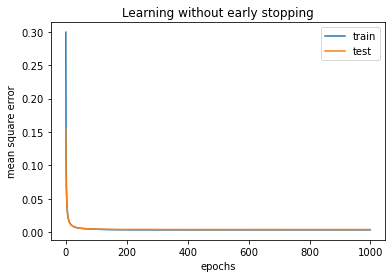

In [35]:
# plot the results for no early-stopping
plt.figure(1)
plt.plot(np.arange(len(histories['starter'].history['loss'])), histories['starter'].history['mse'])
plt.plot(np.arange(len(histories['starter'].history['val_loss'])), histories['starter'].history['val_mse'])
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('Learning without early stopping')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('./plots/partb/q1/1a_train_test_errors.png')

print('* minimum validation error: %2.4f *'%min(histories['starter'].history['val_loss']))

In [36]:
print('Final results from the last epoch')
mse = histories['starter'].history['mse'][epochs-1]
val_mse = histories['starter'].history['val_mse'][epochs-1]
loss = histories['starter'].history['loss'][epochs-1]
val_loss = histories['starter'].history['val_loss'][epochs-1]
    
print()
print(f'MSE\t\t: {mse}')
print(f'Validation MSE\t: {val_mse}')
print(f'Loss\t\t: {loss}')
print(f'Validation Loss\t: {val_loss}')

Final results from the last epoch

MSE		: 0.0036059864796698093
Validation MSE	: 0.004165273625403643
Loss		: 0.0038971921894699335
Validation Loss	: 0.004452796187251806


In [32]:
# Define callbacks
def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=100)]

In [33]:
# create a network
es_model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                                  keras.layers.Dense(1, activation='linear')])

es_model.compile(optimizer=opt, loss=keras.losses.MeanSquaredError(), metrics=['mse'])

# learn the network with early stopping
histories['es'] = es_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size,
                               callbacks= get_callbacks(), validation_data=(testX, testY),
                               verbose = 2)

Epoch 1/1000
35/35 - 0s - loss: 0.6067 - mse: 0.5263 - val_loss: 0.2828 - val_mse: 0.2047
Epoch 2/1000
35/35 - 0s - loss: 0.2647 - mse: 0.1882 - val_loss: 0.1986 - val_mse: 0.1237
Epoch 3/1000
35/35 - 0s - loss: 0.1840 - mse: 0.1102 - val_loss: 0.1517 - val_mse: 0.0791
Epoch 4/1000
35/35 - 0s - loss: 0.1426 - mse: 0.0709 - val_loss: 0.1249 - val_mse: 0.0542
Epoch 5/1000
35/35 - 0s - loss: 0.1184 - mse: 0.0484 - val_loss: 0.1091 - val_mse: 0.0399
Epoch 6/1000
35/35 - 0s - loss: 0.1032 - mse: 0.0347 - val_loss: 0.0994 - val_mse: 0.0316
Epoch 7/1000
35/35 - 0s - loss: 0.0940 - mse: 0.0267 - val_loss: 0.0914 - val_mse: 0.0248
Epoch 8/1000
35/35 - 0s - loss: 0.0868 - mse: 0.0208 - val_loss: 0.0864 - val_mse: 0.0209
Epoch 9/1000
35/35 - 0s - loss: 0.0822 - mse: 0.0173 - val_loss: 0.0831 - val_mse: 0.0188
Epoch 10/1000
35/35 - 0s - loss: 0.0787 - mse: 0.0149 - val_loss: 0.0798 - val_mse: 0.0165
Epoch 11/1000
35/35 - 0s - loss: 0.0759 - mse: 0.0131 - val_loss: 0.0778 - val_mse: 0.0155
Epoch 12

35/35 - 0s - loss: 0.0238 - mse: 0.0043 - val_loss: 0.0250 - val_mse: 0.0057
Epoch 92/1000
35/35 - 0s - loss: 0.0236 - mse: 0.0043 - val_loss: 0.0247 - val_mse: 0.0056
Epoch 93/1000
35/35 - 0s - loss: 0.0233 - mse: 0.0043 - val_loss: 0.0243 - val_mse: 0.0055
Epoch 94/1000
35/35 - 0s - loss: 0.0230 - mse: 0.0043 - val_loss: 0.0241 - val_mse: 0.0056
Epoch 95/1000
35/35 - 0s - loss: 0.0227 - mse: 0.0043 - val_loss: 0.0236 - val_mse: 0.0053
Epoch 96/1000
35/35 - 0s - loss: 0.0225 - mse: 0.0043 - val_loss: 0.0233 - val_mse: 0.0053
Epoch 97/1000
35/35 - 0s - loss: 0.0221 - mse: 0.0042 - val_loss: 0.0231 - val_mse: 0.0053
Epoch 98/1000
35/35 - 0s - loss: 0.0219 - mse: 0.0042 - val_loss: 0.0229 - val_mse: 0.0053
Epoch 99/1000
35/35 - 0s - loss: 0.0216 - mse: 0.0042 - val_loss: 0.0226 - val_mse: 0.0053
Epoch 100/1000
35/35 - 0s - loss: 0.0214 - mse: 0.0042 - val_loss: 0.0224 - val_mse: 0.0054
Epoch 101/1000
35/35 - 0s - loss: 0.0211 - mse: 0.0042 - val_loss: 0.0221 - val_mse: 0.0053
Epoch 102/1

Epoch 181/1000
35/35 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 182/1000
35/35 - 0s - loss: 0.0093 - mse: 0.0038 - val_loss: 0.0101 - val_mse: 0.0046
Epoch 183/1000
35/35 - 0s - loss: 0.0092 - mse: 0.0038 - val_loss: 0.0101 - val_mse: 0.0046
Epoch 184/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0038 - val_loss: 0.0100 - val_mse: 0.0047
Epoch 185/1000
35/35 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 186/1000
35/35 - 0s - loss: 0.0090 - mse: 0.0037 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 187/1000
35/35 - 0s - loss: 0.0089 - mse: 0.0037 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 188/1000
35/35 - 0s - loss: 0.0088 - mse: 0.0037 - val_loss: 0.0096 - val_mse: 0.0046
Epoch 189/1000
35/35 - 0s - loss: 0.0088 - mse: 0.0037 - val_loss: 0.0096 - val_mse: 0.0047
Epoch 190/1000
35/35 - 0s - loss: 0.0087 - mse: 0.0037 - val_loss: 0.0096 - val_mse: 0.0047
Epoch 191/1000
35/35 - 0s - loss: 0.0086 - mse: 0.0037 - val_loss: 0.0095 - val_

35/35 - 0s - loss: 0.0055 - mse: 0.0037 - val_loss: 0.0062 - val_mse: 0.0044
Epoch 271/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0037 - val_loss: 0.0062 - val_mse: 0.0044
Epoch 272/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0037 - val_loss: 0.0062 - val_mse: 0.0044
Epoch 273/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0043
Epoch 274/1000
35/35 - 0s - loss: 0.0055 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 275/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 276/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 277/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 278/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0037 - val_loss: 0.0061 - val_mse: 0.0044
Epoch 279/1000
35/35 - 0s - loss: 0.0054 - mse: 0.0037 - val_loss: 0.0060 - val_mse: 0.0043
Epoch 280/1000
35/35 - 0s - loss: 0.0053 - mse: 0.0037 - val_loss: 0.0060 - val_mse: 0.0044
Epo

Epoch 360/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0051 - val_mse: 0.0044
Epoch 361/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0042
Epoch 362/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0042
Epoch 363/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 364/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 365/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 366/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0049 - val_mse: 0.0042
Epoch 367/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 368/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0049 - val_mse: 0.0042
Epoch 369/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_mse: 0.0043
Epoch 370/1000
35/35 - 0s - loss: 0.0044 - mse: 0.0037 - val_loss: 0.0050 - val_

35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 450/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 451/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 452/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 453/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 454/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 455/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 456/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0045 - val_mse: 0.0041
Epoch 457/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0045 - val_mse: 0.0041
Epoch 458/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0046 - val_mse: 0.0042
Epoch 459/1000
35/35 - 0s - loss: 0.0041 - mse: 0.0037 - val_loss: 0.0045 - val_mse: 0.0042
Epo

Epoch 539/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 540/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 541/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0042
Epoch 542/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 543/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0042
Epoch 544/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0042
Epoch 545/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 546/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 547/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 548/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0041
Epoch 549/1000
35/35 - 0s - loss: 0.0040 - mse: 0.0037 - val_loss: 0.0045 - val_

* minimum validation error: 0.0042 *


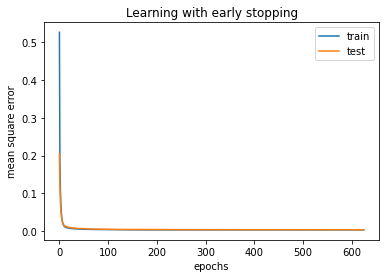

In [38]:
plt.figure(2)
plt.plot(np.arange(len(histories['es'].history['loss'])), histories['es'].history['mse'])
plt.plot(np.arange(len(histories['es'].history['val_loss'])), histories['es'].history['val_mse'])
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('Learning with early stopping')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('./plots/partb/q1/1a_train_test_errors_es.png')

print('* minimum validation error: %2.4f *'%min(histories['starter'].history['val_mse']))

In [39]:
stopped_epochs = len(histories['es'].history['mse'])

In [40]:
print('Final results from the last epoch with early stopping')
mse = histories['es'].history['mse'][stopped_epochs-1]
val_mse = histories['es'].history['val_mse'][stopped_epochs-1]
loss = histories['es'].history['loss'][stopped_epochs-1]
val_loss = histories['es'].history['val_loss'][stopped_epochs-1]
    
print()
print(f'Epochs\t\t: {stopped_epochs}')
print(f'MSE\t\t: {mse}')
print(f'Validation MSE\t: {val_mse}')
print(f'Loss\t\t: {loss}')
print(f'Validation Loss\t: {val_loss}')

Final results from the last epoch with early stopping

Epochs		: 626
MSE		: 0.0036986602935940027
Validation MSE	: 0.004138811957091093
Loss		: 0.00393901951611042
Validation Loss	: 0.004378638230264187


In [41]:
# make a prediction
y_pred_es = es_model.predict(testX[:50])
y_pred = starter_model.predict(testX[:50])

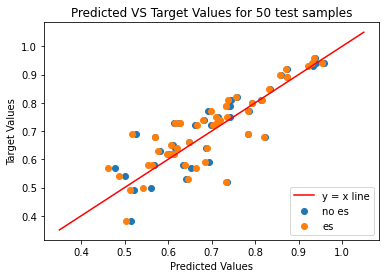

In [42]:
# plot learning curves
plt.scatter(y_pred, testY[:50], label='no es')
plt.scatter(y_pred_es, testY[:50], label='es')
x = np.arange(0.35,1.1,0.1)
plt.plot(x, x, 'r', label= 'y = x line')
plt.title('Predicted VS Target Values for 50 test samples')
plt.ylabel('Target Values')
plt.xlabel('Predicted Values')
plt.legend(loc="lower right")
plt.savefig('./plots/partb/q1/1a_predicted_target.png')
plt.show()